In [185]:
#Scraping from NCAA Mens Soccer Website
from bs4 import BeautifulSoup
import requests
import time
import pandas as pd
import matplotlib.pyplot as plt
from soccerplots.radar_chart import Radar
from soccerplots.utils import add_image

find_stat = ['90', '32', '575', '1192', '975', '33', '30','977']
url_cool = 'https://www.ncaa.com/stats/soccer-men/d1/current/team/{}'
time.sleep(5)

def get_table_data(link_number):
    try:
        url = url_cool.format(link_number)
        response = requests.get(url, timeout=10)
        response.raise_for_status()
        soup = BeautifulSoup(response.text, 'html.parser')
        table = soup.find('table')
        team_data = pd.read_html(str(table))[0]
        return team_data
    except Exception as e:
        print(f"Error retrieving data for {link_number}: {e}")
        return None

# Initialize an empty list to store tables
all_tables = []

# Loop through pages (p2, p3, p4, etc.)
for page_number in range(2, 6):  # Adjust the range as needed
    tables = [get_table_data(f'{stat}?page={page_number}') for stat in find_stat]
    all_tables.extend(tables)
    time.sleep(5)  # Add a delay between requests

# Concatenate all tables into result_table
result_table = pd.concat(all_tables, ignore_index=True)

# Set 'Team' as the index for groupby
result_table.set_index('Team', inplace=True)

# Group by 'Team' and fill NaN values with the first non-null value in each group
result_table = result_table.groupby('Team').first().reset_index()

# Display the merged and consolidated DataFrame
print(result_table)


/var/folders/8_/_mkv7dtj7hvfvhvj31qsy35h0000gn/T/ipykernel_42257/1903091785.py:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  team_data = pd.read_html(str(table))[0]
/var/folders/8_/_mkv7dtj7hvfvhvj31qsy35h0000gn/T/ipykernel_42257/1903091785.py:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  team_data = pd.read_html(str(table))[0]
/var/folders/8_/_mkv7dtj7hvfvhvj31qsy35h0000gn/T/ipykernel_42257/1903091785.py:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  team_data = pd.read_html(str(table))[0]
/var/folders/8_/_mkv7dtj7hvfvhvj31qsy35h0000gn/T/ipykernel_42257/1903091785.py:20: FutureWarning: Passing literal html

               Team Rank  Assists  Team Games  Per Game  Team Min    GA  \
0             Akron   33     36.0        18.0      2.00    1620.0  12.0   
1          American   48      NaN        16.0      1.88       NaN   NaN   
2           Belmont   43     32.0        18.0      1.78       NaN   NaN   
3         Boston U.   29      NaN        20.0       NaN    1800.0  18.0   
4            Bryant   36     38.0        20.0      1.90    1820.0   6.0   
..              ...  ...      ...         ...       ...       ...   ...   
118   Western Mich.    1     69.0        20.0      3.45    1820.0  15.0   
119  William & Mary   45      NaN        16.0       NaN       NaN   NaN   
120         Wofford   26      NaN        17.0       NaN    1530.0  15.0   
121          Xavier   24      NaN        19.0       NaN    1730.0  16.0   
122            Yale    -      NaN        19.0       NaN    1710.0  18.0   

       GAA  Goals    SoG  ShAtt   Pct.   Won  Loss  Tied  
0    0.667   31.0  143.0  334.0  0.694  

In [186]:
pd.DataFrame(result_table)

,Team,Rank,Assists,Team Games,Per Game,Team Min,GA,GAA,Goals,SoG,ShAtt,Pct.,Won,Loss,Tied
0,Akron,33,36.0,18.0,2.00,1620.0,12.0,0.667,31.0,143.0,334.0,0.694,9.0,2.0,7.0
1,American,48,NaN,16.0,1.88,NaN,NaN,NaN,30.0,NaN,NaN,NaN,NaN,NaN,NaN
2,Belmont,43,32.0,18.0,1.78,NaN,NaN,NaN,26.0,97.0,200.0,0.485,NaN,NaN,NaN
3,Boston U.,29,NaN,20.0,NaN,1800.0,18.0,0.900,31.0,NaN,NaN,0.700,12.0,4.0,4.0
4,Bryant,36,38.0,20.0,1.90,1820.0,6.0,0.297,45.0,113.0,229.0,0.493,16.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,Western Mich.,1,69.0,20.0,3.45,1820.0,15.0,0.742,49.0,135.0,316.0,0.875,16.0,1.0,3.0
119,William & Mary,45,NaN,16.0,NaN,NaN,NaN,NaN,16.0,78.0,172.0,0.453,NaN,NaN,NaN
120,Wofford,26,NaN,17.0,NaN,1530.0,15.0,0.882,NaN,NaN,NaN,NaN,NaN,NaN,NaN
121,Xavier,24,NaN,19.0,NaN,1730.0,16.0,0.832,22.0,109.0,211.0,0.517,NaN,NaN,NaN


In [197]:
#Filtered out for Charlotte and Clemson
Charlotte_Rows = result_table.loc[result_table['Team'] == 'Charlotte']
pd.DataFrame(Charlotte_Rows)

,Team,Rank,Assists,Team Games,Per Game,Team Min,GA,GAA,Goals,SoG,ShAtt,Pct.,Won,Loss,Tied
11,Charlotte,26,35.0,17.0,2.06,1511.0,12.0,0.715,34.0,94.0,207.0,0.454,13.0,3.0,1.0


In [198]:
Clemson_Rows = result_table.loc[result_table['Team']=='Clemson']
pd.DataFrame(Clemson_Rows)

,Team,Rank,Assists,Team Games,Per Game,Team Min,GA,GAA,Goals,SoG,ShAtt,Pct.,Won,Loss,Tied
12,Clemson,18,39.0,18.0,2.17,1660.0,18.0,0.976,51.0,131.0,291.0,0.694,10.0,3.0,5.0


In [199]:
#Merged data manually to get rid of extra Charlotte Rows
data = {'Team': ['Charlotte', 'Charlotte', 'Charlotte'],
        'Assists': [35.0, None, None],
        'Team Games': [17.0, 17.0, 17.0],
        'Per Game': [2.06, None, None],
        'Team Min': [None, 1511.0, None],
        'GA': [None, 12.0, None],
        'GAA': [None, 0.715, None],
        'Goals': [None, None, 34.0],
        'SoG': [None, None, 94.0],
        'ShAtt': [None, None, 207.0],
        'Pct.': [None, None, 0.454],
        'Won': [None, 13.0, None],
        'Loss': [None, 3.0, None],
        'Tied': [None, 1.0, None]}

Charlotte_Rows = pd.DataFrame(data)

# Aggregate the rows into a single row using sum (ignores NaN values)
consolidated_row = Charlotte_Rows.groupby('Team').sum().reset_index()

# Display the consolidated DataFrame
pd.DataFrame(consolidated_row)

,Team,Assists,Team Games,Per Game,Team Min,GA,GAA,Goals,SoG,ShAtt,Pct.,Won,Loss,Tied
0,Charlotte,35.0,51.0,2.06,1511.0,12.0,0.715,34.0,94.0,207.0,0.454,13.0,3.0,1.0


Clemson_Rows

In [201]:
# Combined DataFrames together
consolidated_row.reset_index(drop=True, inplace=True)
Clemson_Rows.reset_index(drop=True, inplace=True)

# Concatenate DataFrames vertically (stacked on top of each other)
merged_df = pd.concat([consolidated_row, Clemson_Rows])
pd.DataFrame(merged_df)

,Team,Assists,Team Games,Per Game,Team Min,GA,GAA,Goals,SoG,ShAtt,Pct.,Won,Loss,Tied,Rank
0,Charlotte,35.0,51.0,2.06,1511.0,12.0,0.715,34.0,94.0,207.0,0.454,13.0,3.0,1.0,NaN
0,Clemson,39.0,18.0,2.17,1660.0,18.0,0.976,51.0,131.0,291.0,0.694,10.0,3.0,5.0,18


In [204]:
#Manually added 2 stats I forgot initially
merged_df['Shutout Pct']=[.471, .333]
merged_df['Save Pct'] = [.769,.710]

In [205]:
#Drop all uneccessary stats for radar charts
merged_df = merged_df.drop(['Rank', 'Tied', 'Loss', 'Won','Pct.','Team Games','Team Min','Per Game'],axis=1)

In [206]:
merged_df

,Team,Assists,GA,GAA,Goals,SoG,ShAtt,Shutout Pct,Save Pct
0,Charlotte,35.0,12.0,0.715,34.0,94.0,207.0,0.471,0.769
0,Clemson,39.0,18.0,0.976,51.0,131.0,291.0,0.333,0.710


In [207]:
#get parameters
params = list(df.columns)
params = params[1:]
params

['Assists', 'GA', 'GAA', 'Goals', 'SoG', 'ShAtt', 'Save Pct', 'Shutout Pct']

In [208]:
# Get parameters
params = list(df.columns)[1:]

# Add ranges to list of tuple pairs
ranges = []
for x in params:
    a = min(df[x])
    a = a - (a * 0.25)
    
    b = max(df[x])
    b = b + (b * 0.25)
    
    ranges.append((a, b))

# Extract rows for 'Charlotte' and 'Clemson'
a_values = df[df['Team'] == 'Charlotte'].iloc[:, 1:].values.tolist()
b_values = df[df['Team'] == 'Clemson'].iloc[:, 1:].values.tolist()

# Check if rows were found for 'Charlotte' and 'Clemson'
if a_values and b_values:
    values = [a_values[0], b_values[0]]
else:
    print("'Charlotte' or 'Clemson' not found in the DataFrame.")

# Display parameters, ranges, and values
print("Parameters:", params)
print("Ranges:", ranges)
print("Values:", values)

Parameters: ['Assists', 'GA', 'GAA', 'Goals', 'SoG', 'ShAtt', 'Save Pct', 'Shutout Pct']
Ranges: [(26.25, 48.75), (9.0, 22.5), (0.53625, 1.22), (25.5, 63.75), (70.5, 163.75), (155.25, 363.75), (0.5325, 0.96125), (0.24975000000000003, 0.58875)]
Values: [[35.0, 12.0, 0.715, 34.0, 94.0, 207.0, 0.769, 0.471], [39.0, 18.0, 0.976, 51.0, 131.0, 291.0, 0.71, 0.333]]


In [209]:
a_values

[[35.0, 12.0, 0.715, 34.0, 94.0, 207.0, 0.769, 0.471]]

In [210]:
b_values

[[39.0, 18.0, 0.976, 51.0, 131.0, 291.0, 0.71, 0.333]]

In [211]:
#title

title = dict(
    title_name='Charlotte',
    title_color = '#005035',
    subtitle_name = 'Mens Soccer',
    subtitle_color = '#005035',
    title_name_2 ='Clemson',
    title_color_2 = '#F56600',
    subtitle_name_2 = 'Mens Soccer',
    subtitle_color_2 = '#F56600',
    title_fontsize = 18,
    subtitle_fontsize = 15
)

endnote = 'Calvin Zheng\ndata via NCAA Mens Soccer Page / SoccerStats'

findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Fo

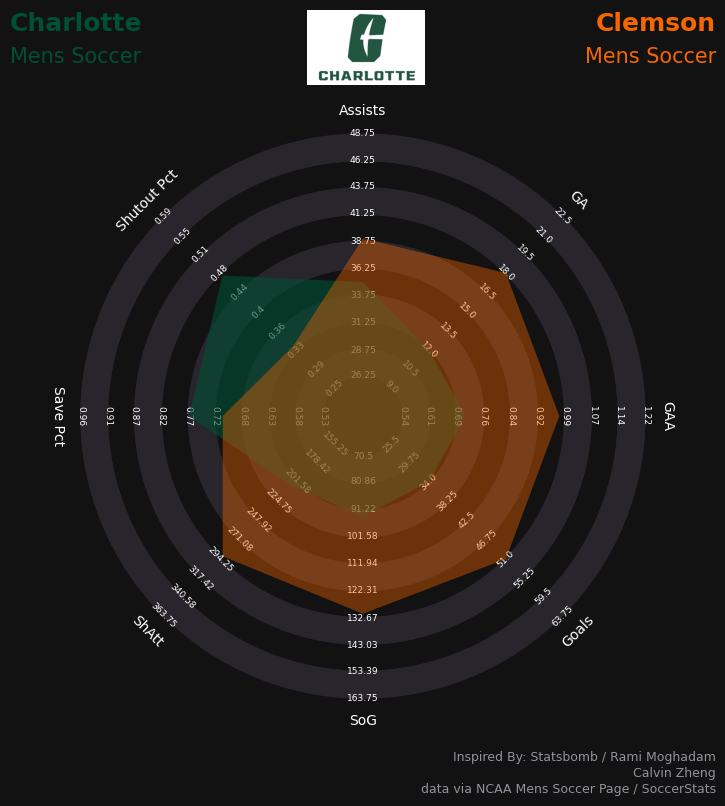

In [212]:
radar = Radar()
## instantiate object 
radar = Radar(background_color="#121212", patch_color="#28252C", label_color="#FFFFFF",
              range_color="#FFFFFF")
fig,ax = radar.plot_radar(ranges=ranges,params=params,values=values,
                          radar_color=['#005035','#F56600'],
                          alphas=[.6,.4],title=title,endnote=endnote,
                          filename="my_radar.jpg", dpi=1000,
                          compare=True)
fig = add_image(image="/Users/calvi/Downloads/Charlotte.jpeg", fig=fig, left=0.464, bottom=0.81, width=0.1, height=0.075)